In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("spam_dataset.csv")

In [3]:
data.head()

,message_content,is_spam
0,"Hello Lonnie,\n\nJust wanted to touch base reg...",0
1,"Congratulations, you've won a prize! Call us n...",1
2,You have been pre-approved for a credit card w...,1
3,"Limited time offer, act now! Only a few spots ...",1
4,Your loan has been approved! Transfer funds to...,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   message_content  1000 non-null   object
 1   is_spam          1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
data.isnull().sum()

message_content    0
is_spam            0
dtype: int64

In [6]:
data.shape

(1000, 2)

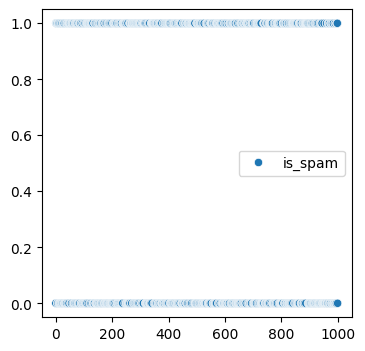

In [7]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=data)
plt.show()

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# Converts text into a matrix of token counts

In [10]:
vectorizer=CountVectorizer(stop_words="english")

x=vectorizer.fit_transform(data["message_content"]).toarray()

In [11]:
y=data["is_spam"]

In [12]:
# train test split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=.50,random_state=42)

In [14]:
x_train.shape

(500, 1573)

In [15]:
#  model implementation

In [16]:
model=MultinomialNB()

In [17]:
model.fit(x_train,y_train)

MultinomialNB()

In [18]:
y_pred=model.predict(x_test)

In [19]:
#  accuracy score

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[248   0]
 [  0 252]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       248
           1       1.00      1.00      1.00       252

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [21]:
# prediction

In [23]:

new_email = ["hi aditya you are selected for this role"]
new_email_vectorized = vectorizer.transform(new_email).toarray()
single_prediction = model.predict(new_email_vectorized)
print(single_prediction)  

[0]


In [ ]:
#  pickle

In [24]:
import pickle

# Save the model
with open('spam_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Save the vectorizer as well
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

print("Model and vectorizer saved.")


Model and vectorizer saved.
